# THE SPARKS FOUNDATION 
# Task 1:

Predict the percentage of a student based on the no. of study hours using linear regression


# SHIVAM KUMAR

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wg
wg.filterwarnings("ignore")

In [2]:
raw_data='http://bit.ly/w-data'
df=pd.read_csv(raw_data)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


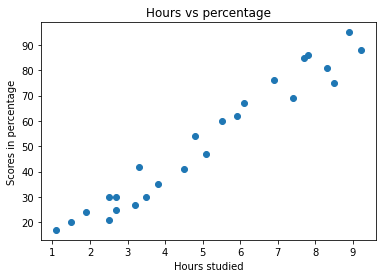

In [5]:
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('Hours studied')
plt.ylabel('Scores in percentage')
plt.title('Hours vs percentage')
plt.show()

In [6]:
# we are checking that there are outliers in the data or not
hours=df['Hours']
scores=df['Scores']

<AxesSubplot:xlabel='Hours', ylabel='Density'>

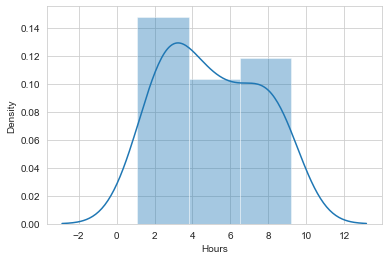

In [22]:
sns.distplot(hours)

<AxesSubplot:xlabel='Scores', ylabel='Density'>

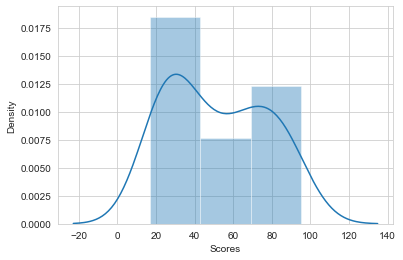

In [23]:
sns.distplot(scores)

In [7]:
#dividing the data into training(80%) and testing data(20%)
#linear regression
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)

In [13]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

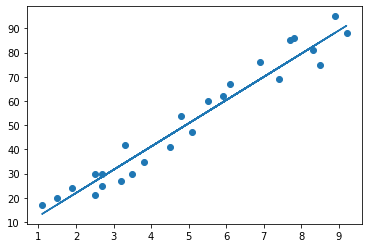

In [14]:
m=reg.coef_
c=reg.intercept_
line=m*x+c
plt.scatter(x, y)
plt.plot(x, line)
plt.show()

In [15]:
y_predicted=reg.predict(x_test)
actual_predicted=pd.DataFrame({'Target':y_test,'Predicted':y_predicted})
print(actual_predicted)

   Target  Predicted
0      95  88.211394
1      30  28.718453
2      76  69.020122
3      35  39.273652
4      17  13.365436


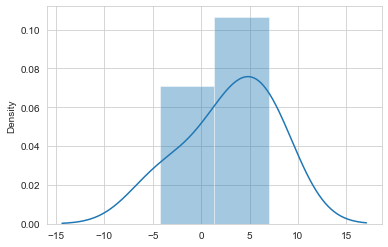

In [16]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_predicted))
plt.show()

In [19]:
# what will be the predicted score if a student studies for 9.25 hours/day
h=9.25
p=reg.predict([[h]])
print("If a student studies for {} hours per day he/she will score {} % in exam ".format(h,p))

If a student studies for 9.25 hours per day he/she will score [91.56986604] % in exam 


# Model evaluation


In [21]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_predicted))

Mean Absolute Error: 4.5916495300630285
